In [1]:
#importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
from pymongo import MongoClient

import mysql.connector as mysql
from mysql.connector import Error

#from Database import Airbnbs, Hosts, Airbnb_Details, Neighbourhoods, creating_engine, creating_session, closing_session

In [2]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Constantes
table='airbnb_detail'
filePath = "uk-500.csv"
filePath2 = "Airbnb_Open_Data3.csv"
createDatabase="CREATE DATABASE employee"
createDatabase2="CREATE DATABASE neighbourhoods"
dropTable='DROP TABLE IF EXISTS employee_data;'
dropTable2='DROP TABLE IF EXISTS airbnb_detail;'
sentence='''CREATE TABLE employee_data(first_name varchar(255),last_name varchar(255),company_name varchar(255),
address varchar(255),city varchar(255),county varchar(255),postal varchar(255),phone1 varchar(255),
phone2 varchar(255),email varchar(255),web varchar(255))'''
sentence2=("CREATE TABLE airbnb_detail( id  BIGINT, NAME  VARCHAR(500), host_id  VARCHAR(500), host_identity_verified "
           "VARCHAR(500), host_name VARCHAR(500), neighbourhood_group VARCHAR(500), neighbourhood VARCHAR(500), "
           "lat VARCHAR(500), `long` VARCHAR(500), country VARCHAR(500), country_code VARCHAR(500), "
           "instant_bookable VARCHAR(500), cancellation_policy VARCHAR(500), room_type VARCHAR(500), Construction_year VARCHAR("
           "500), price VARCHAR(500), service_fee VARCHAR(500), minimum_nights VARCHAR(500), number_of_reviews "
           "VARCHAR(500), last_review VARCHAR(500), reviews_per_month VARCHAR(500), "
           "review_rate_number VARCHAR(500), calculated_host_listings_count VARCHAR(500), availability_365 VARCHAR(500), "
           "house_rules VARCHAR(1400), license VARCHAR(500))")
insert="INSERT INTO employee.employee_data VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
insert2="INSERT INTO neighbourhoods.airbnb_detail VALUES ({id}, {NAME}, {host_id}, {host_name},{neighbourhood_group},{neighbourhood},{lat},{long},{country},{country_code},{instant_bookable},{cancellation_policy},{room_type},{Construction_year},{price},{service_fee},{minimum_nights},{number_of_reviews},{last_review},{reviews_per_month},{review_rate_number},{calculated_host_listings_count},{availability_365},{house_rules},{license})"
insert3="INSERT INTO neighbourhoods.airbnb_detail VALUES {}"
userDataBase = "root"
passDataBase = "Taison2023."
tableDataBase = "employee"
tableDataBase2 = "neighbourhoods"
#Constantes

In [3]:
#Creating engine
#engine1 = creating_engine()

#Creating session
#session1 = creating_session(engine1)

## Proceso de Exploración

### Leemos el archivo como un dataframe usando pandas

In [4]:
df_airbnb=pd.read_csv("Airbnb_Open_Data3.csv", low_memory=False, na_values=[''])
df_airbnb.head(2)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long2,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


### Se hacen ajustes a ciertas columnas con el fin de poder subir el csv a la base de datos 

In [5]:
try:
    conn = mysql.connect(host='localhost', user=userDataBase, password=passDataBase)
    # give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute(createDatabase2)
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)


Error while connecting to MySQL 1007 (HY000): Can't create database 'neighbourhoods'; database exists


In [6]:
try:
    conn = mysql.connect(host='localhost', database=tableDataBase2, user=userDataBase, password=passDataBase)
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute(dropTable2)
        print('Creating table....')
        # in the below line please pass the creation table statement which you want #to create
        cursor.execute(sentence2)
        print("Table is created....")
        
except Error as e:
    print("Error while connecting to MySQL", e)


You're connected to database:  ('neighbourhoods',)
Creating table....
Table is created....


In [7]:
try:
    if conn.is_connected():
        iter=0
        # loop through the data frame
        for i, row in df_airbnb.iterrows():
            # here %S means string values
            #print(len(tuple(row)))
            #print(insert3.format(tuple(row)).replace(", nan",', "nan"'))
            cursor.execute(insert3.format(tuple(row)).replace(", nan",', Null'))
            if iter == 1000:
                print(f"Record inserted {(i/df_airbnb.shape[0])*100}%")
                iter=0
            # the connection is not auto committed by default, so we must commit to save our changes
            iter+=1
            conn.commit()
        print(f"Record inserted {(i/df_airbnb.shape[0])*100}%")
except Error as e:
    print("Error while connecting to MySQL", e)


Record inserted 0.9746683690874179%
Record inserted 1.9493367381748359%
Record inserted 2.924005107262254%
Record inserted 3.8986734763496718%
Record inserted 4.87334184543709%
Record inserted 5.848010214524508%
Record inserted 6.822678583611926%
Record inserted 7.7973469526993435%
Record inserted 8.772015321786762%
Record inserted 9.74668369087418%
Record inserted 10.721352059961598%
Record inserted 11.696020429049016%
Record inserted 12.670688798136434%
Record inserted 13.645357167223851%
Record inserted 14.620025536311271%
Record inserted 15.594693905398687%
Record inserted 16.569362274486107%
Record inserted 17.544030643573524%
Record inserted 18.518699012660942%
Record inserted 19.49336738174836%
Record inserted 20.468035750835778%
Record inserted 21.442704119923196%
Record inserted 22.417372489010614%
Record inserted 23.39204085809803%
Record inserted 24.366709227185453%
Record inserted 25.341377596272867%
Record inserted 26.316045965360285%
Record inserted 27.290714334447703%
Re

In [8]:
query=f'select * from {table}'
df_airbnb=pd.read_sql(query,conn)
df_airbnb

C:\Users\Juanchope\AppData\Local\Temp\ipykernel_12600\618515368.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_airbnb=pd.read_sql(query,conn)


,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,None,None,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.1,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,None,None,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,None
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.8046,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,None
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,None,None,5.0,1.0,342.0,None,None
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.1,3.0,1.0,386.0,None,None


In [11]:
df_airbnb.dtypes

id                                  int64
NAME                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country_code                       object
instant_bookable                   object
cancellation_policy                object
room_type                          object
Construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

### Organizamos los tipos de las variables

In [10]:
columna_float = ["lat", "long", "Construction_year", "minimum_nights", "number_of_reviews", "reviews_per_month", "review_rate_number", "calculated_host_listings_count", "availability_365"]
df_airbnb[columna_float] = df_airbnb[columna_float].astype('float64')
df_airbnb['host_id'] = df_airbnb['host_id'].astype('int64')



###  ¿Cuales son las dimensiones del Dataset?

In [13]:
df_airbnb.shape

(102599, 26)

### Cuantos Duplicados Tenemos?

In [40]:
duplicados = df_airbnb.duplicated()
duplicados.sum()

0

#### Eliminamos los duplicados

In [39]:
df_airbnb = df_airbnb.drop_duplicates()

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [14]:
df_airbnb.isnull().any()

id                                False
NAME                               True
host_id                           False
host_identity_verified             True
host_name                          True
neighbourhood_group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country_code                       True
instant_bookable                   True
cancellation_policy                True
room_type                         False
Construction_year                  True
price                              True
service_fee                        True
minimum_nights                     True
number_of_reviews                  True
last_review                        True
reviews_per_month                  True
review_rate_number                 True
calculated_host_listings_count     True
availability_365                   True
house_rules                        True


### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [41]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


availability_365                  448
host_name                         404
minimum_nights                    400
calculated_host_listings_count    319
review_rate_number                319
service_fee                       273
name                              250
price                             247
number_of_reviews                 183
last_review                       159
reviews_per_month                 145
instant_bookable                  105
cancellation_policy                76
neighbourhood_group                29
neighbourhood                      16
long                                8
lat                                 8
id                                  0
room_type                           0
construction_year                   0
host_identity_verified              0
host_id                             0
house_rules                         0
dtype: int64

### ¿Cuál es la proporción de valores nulos por cada variable? 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


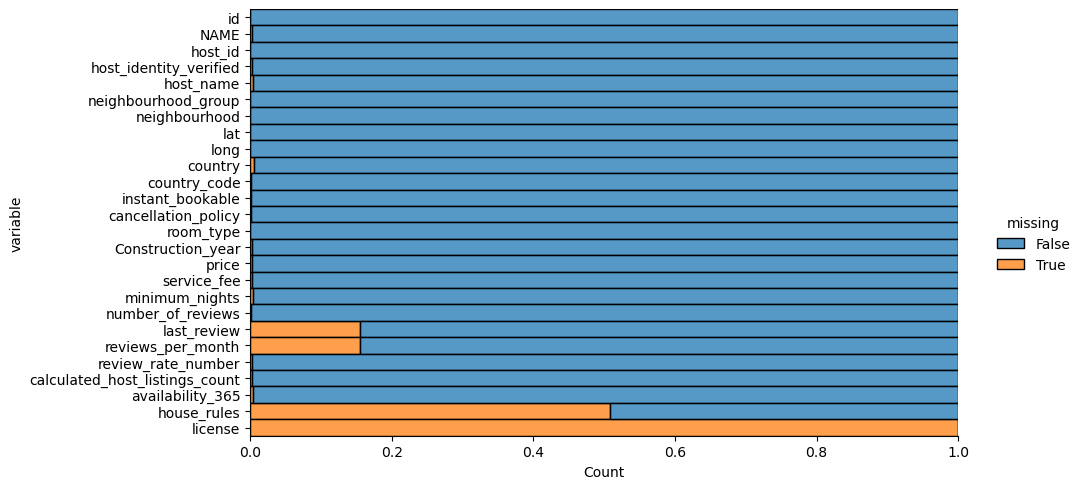

In [15]:
(
    df_airbnb
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

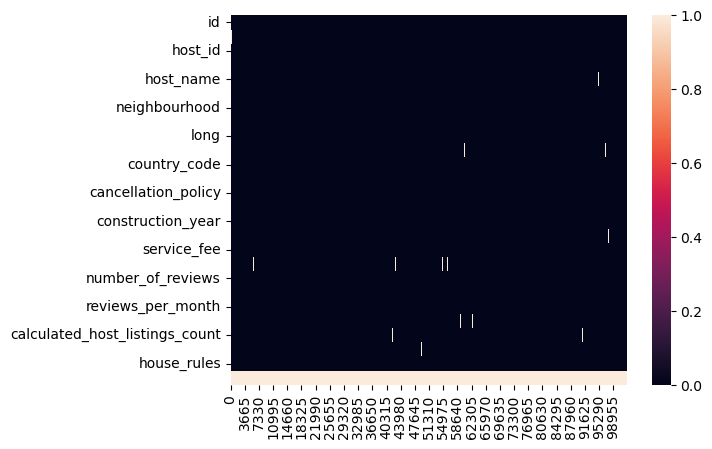

In [28]:
(
    df_airbnb
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [16]:
(
    df_airbnb
    .isnull()
    .sum()
    .sum()
)

190769

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [45]:
df_airbnb.describe(include='all')


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
count,1.020580e+05,101808,1.020580e+05,102058,101654,102029,102042,102050.000000,102050.000000,101953,...,101811.000000,101785.000000,101658.000000,101875.000000,101899.0,101913.000000,101739.000000,101739.000000,101610.000000,102058
unique,NaN,60005,NaN,3,13066,7,224,NaN,NaN,2,...,NaN,NaN,NaN,NaN,2478.0,NaN,NaN,NaN,NaN,1952
top,NaN,,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,No se Especificaron Las Reglas
freq,NaN,161,NaN,50944,878,43557,7898,NaN,NaN,51186,...,NaN,NaN,NaN,NaN,15673.0,NaN,NaN,NaN,NaN,51842
mean,2.918438e+07,NaN,4.926738e+10,NaN,NaN,NaN,NaN,40.728097,-73.949652,NaN,...,625.355580,125.039249,8.165516,27.517948,NaN,1.163887,3.278733,7.936937,141.043992,NaN
std,1.627173e+07,NaN,2.853742e+10,NaN,NaN,NaN,NaN,0.055852,0.049502,NaN,...,331.672649,66.325905,30.606353,49.571744,NaN,1.682808,1.285089,32.266355,135.429156,NaN
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,...,50.000000,10.000000,1.000000,0.000000,NaN,0.000000,1.000000,1.000000,-10.000000,NaN
25%,1.509286e+07,NaN,2.459924e+10,NaN,NaN,NaN,NaN,40.688730,-73.982580,NaN,...,340.000000,68.000000,2.000000,1.000000,NaN,0.090000,2.000000,1.000000,3.000000,NaN
50%,2.918438e+07,NaN,4.912865e+10,NaN,NaN,NaN,NaN,40.722290,-73.954440,NaN,...,625.000000,125.000000,3.000000,7.000000,NaN,0.480000,3.000000,1.000000,96.000000,NaN
75%,4.327590e+07,NaN,7.400619e+10,NaN,NaN,NaN,NaN,40.762760,-73.932350,NaN,...,913.000000,183.000000,5.000000,31.000000,NaN,1.710000,4.000000,2.000000,268.000000,NaN


### Solo las numéricas

In [44]:
df_airbnb.describe(include=[np.number])


,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,102058.000000,101811.000000,101785.000000,101658.000000,101875.000000,101913.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2008.268210,625.355580,125.039249,8.165516,27.517948,1.163887,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,92.238321,331.672649,66.325905,30.606353,49.571744,1.682808,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,50.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.090000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,31.000000,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


### Solo categóricas - 1

In [47]:
df_airbnb.describe(include=object)

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,last_review,house_rules
count,101808,102058,101654,102029,102042,101953,101982,102058,101899,102058
unique,60005,3,13066,7,224,2,3,4,2478,1952
top,,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,0,moderate,Entire home/apt,0,No se Especificaron Las Reglas
freq,161,50944,878,43557,7898,51186,34162,53429,15673,51842


## Proceso de Limpieza 

In [ ]:
df_airbnb = df_airbnb.drop_duplicates()

#### Estandarizamos los nombres

In [15]:
new_column_names = [x.lower().replace(" ", "_") for x in df_airbnb.columns]
df_airbnb.columns = new_column_names

#### Dado que el atributo de "host_identity_verified" cuenta con valores nulos, vamos a llenar dichos valores con unverified

In [17]:
df_airbnb["host_identity_verified"].fillna("unverified", inplace=True)
df_airbnb

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unverified,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,None,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,None
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,None
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,None,NaN,5.0,1.0,342.0,None,None
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,None,None


#### Es necesario eliminar los símbolos de dólar de las columnas "price" y "service_fee"

In [18]:
df_airbnb["price"] = df_airbnb["price"].str.replace('$', '').str.replace(',', '').str.strip()
df_airbnb["service_fee"] = df_airbnb["service_fee"].str.replace('$', '').str.replace(',', '').str.strip()

# Convertir las columnas "price" y "service_fee" a valores flotantes
df_airbnb["price"] = df_airbnb["price"].astype(float)
df_airbnb["service_fee"] = df_airbnb["service_fee"].astype(float)

#Verificamos que no haya ningún registro en el que el service fee sea mayor al precio
counter = df_airbnb["price"] < df_airbnb["service_fee"]
count_greater_service_fee = counter.sum()
count_greater_service_fee

0

#### Limpia los valores no finitos en la columna "Construction year"

In [19]:
df_airbnb["construction_year"] = df_airbnb["construction_year"].replace([np.inf, -np.inf], np.nan)
df_airbnb["construction_year"] = df_airbnb["construction_year"].fillna(0)  # Rellenar valores nulos con 0 o el valor 

#### Cambiamos la columna "Construction year" de tipo float64 a int32, ya que los años son enteros.

In [20]:
df_airbnb["construction_year"] = df_airbnb["construction_year"].astype(int)

#### Reemplaza los valores nulos por 0 en las columnas "last review" y "reviews per month". Cuando la columna number of reviews es 0.

In [23]:
filtered_df = df_airbnb[df_airbnb["number_of_reviews"] == 0]
# Muestra los registros filtrados
print(filtered_df)

# Cuenta los valores nulos en la columna "last_review"
null_last_review = filtered_df["last_review"].isnull().sum()
# Cuenta los valores nulos en la columna "reviews_per_month"
null_reviews_per_month = filtered_df["reviews_per_month"].isnull().sum()

# Muestra los resultados
print("Registros nulos en last review:", null_last_review)
print("Registros nulos en reviews per month:", null_reviews_per_month)

             id                                               name  \
2       1002403                THE VILLAGE OF HARLEM....NEW YORK !   
20      1012382                  Huge 2 BR Upper East  Cental Park   
27      1016248  Magnifique Suite au N de Manhattan - vue Cloitres   
37      1021771                        Clean and Quiet in Brooklyn   
39      1022876                          Country space in the city   
...         ...                                                ...   
102590  6090228                Wonderful artists' loft in Brooklyn   
102592  6091333                3BR/1 Ba in TriBeCa w/ outdoor deck   
102594  6092437                         Spare room in Williamsburg   
102596  6093542                     Comfy, bright room in Brooklyn   
102598  6094647                               585 sf Luxury Studio   

            host_id host_identity_verified host_name neighbourhood_group  \
2       78829239556             unverified     Elise           Manhattan   
20     

In [22]:
df_airbnb.loc[df_airbnb["number_of_reviews"] == 0, "last_review"] = 0
df_airbnb.loc[df_airbnb["number_of_reviews"] == 0, "reviews_per_month"] = 0

#### Remplazar los nulos de la columna house_rules 

In [24]:
df_airbnb["house_rules"] = df_airbnb["house_rules"].fillna("No se Especificaron Las Reglas")

In [25]:
df_airbnb

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unverified,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,0,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,No se Especificaron Las Reglas,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,0,0.00,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,None
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,None
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,0,0.00,5.0,1.0,342.0,No se Especificaron Las Reglas,None
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,No se Especificaron Las Reglas,None


## these nulls will already be treated in the pure transformation phase and not in this EDA phase.

In [36]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


availability_365                  448
minimum_nights                    409
host_name                         406
review_rate_number                326
calculated_host_listings_count    319
service_fee                       273
name                              250
price                             247
number_of_reviews                 183
last_review                       159
reviews_per_month                 145
instant_bookable                  105
cancellation_policy                76
neighbourhood_group                29
neighbourhood                      16
long                                8
lat                                 8
id                                  0
room_type                           0
construction_year                   0
host_identity_verified              0
host_id                             0
house_rules                         0
dtype: int64

In [48]:
#Usamos regrex para evitar los caracteres especiales y númericos
df_airbnb["name"] = df_airbnb["name"].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df_airbnb["house_rules"] = df_airbnb["house_rules"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df_airbnb["host_name"] = df_airbnb["host_name"].str.replace(r'[^a-zA-Z\s]', '', regex=True)

#Dropeamos aquellas columnas que no aportan un valor insignficante al código 
df_airbnb.drop(["license", "country", "country_code"], axis=1, inplace=True)


KeyError: "['license', 'country', 'country_code'] not found in axis"

In [35]:
#Quitamos los valores nulos del host name
df_airbnb["host_name"].fillna("no provided") 

#Admitimos solo valores positivos para la columna minimum nights
df_airbnb["minimum_nights"] = df_airbnb["minimum_nights"].abs()


In [49]:
df_airbnb.describe(include=[np.number])

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,102058.000000,101811.000000,101785.000000,101658.000000,101875.000000,101913.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2008.268210,625.355580,125.039249,8.165516,27.517948,1.163887,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,92.238321,331.672649,66.325905,30.606353,49.571744,1.682808,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,50.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.090000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,31.000000,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


#1 Columna aviability_365

tenemos que borrar todos los datos que sean menores a 0 y mayores a 366 dias

y verificar los mayores a 268 

mirar que 
#2 Columna minimun_nights 

verificamos si hay noches mayores a 30 dias, 
y verificar despues de 5 

|
#3 Columna number_of_reviews   

al parecer hay outliers entonces verificamos el numero de reviews por encima de 7 que es el 75 %


#4 Columna reviews_per_month   

al parecer hay outliers entonces verificamos el numero de reviews por encima de 1.71 que es el 75 %

#5 Columna calculated_host_listings_count
 mirar si hay mas de 2 que es el 75 %

### Creación de las dimensiones 

In [27]:
neighbourhood_table = df_airbnb[["neighbourhood_group", "neighbourhood", "lat", "long"]]
neighbourhood_table.head(2)

,neighbourhood_group,neighbourhood,lat,long
0,Brooklyn,Kensington,40.64749,-73.97237
1,Manhattan,Midtown,40.75362,-73.98377


In [28]:
host_table = df_airbnb[["host_id", "host_name", "host_identity_verified"]]
host_table.head(2)

,host_id,host_name,host_identity_verified
0,80014485718,Madaline,unconfirmed
1,52335172823,Jenna,verified


In [29]:
airbnb_detail = df_airbnb[
    ["id", "name", "instant_bookable", 
     "cancellation_policy", "room_type", "construction_year", 
     "price", "service_fee", "minimum_nights", "number_of_reviews", 
     "last_review", "reviews_per_month", "review_rate_number", "calculated_host_listings_count", 
     "availability_365", "house_rules"]]

airbnb_detail.head(2)

,id,name,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,0,strict,Private room,2020,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,0,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...


### Transformaciones a la dimensión de Neighbourhoods

#### Agrupamos con el fin de no tener datos redundantes, calculando además promedio de latitud y longitud

In [30]:
neighbourhood_table = neighbourhood_table.groupby(["neighbourhood_group", "neighbourhood"]).agg({
    "lat": "mean",
    "long": "mean"
}).reset_index()

#Creamos ID y reorganizamos columnas
neighbourhood_table["neighbourhood_id"] = range(1, len(neighbourhood_table) + 1)
column_order = ["neighbourhood_id", "neighbourhood_group", "neighbourhood", "lat", "long"]
neighbourhood_table = neighbourhood_table[column_order]

neighbourhood_table.head(2)

,neighbourhood_id,neighbourhood_group,neighbourhood,lat,long
0,1,Bronx,Allerton,40.864730,-73.859631
1,2,Bronx,Baychester,40.873964,-73.843080


### Proceso de limpieza a nuestra tabla de hecho (df_airbnb)

In [31]:
#Delete the following columns since we already set up diferent tables to save all the information related with neighbourhoods and hosts
df_airbnb.drop(
         ["id", "name", "instant_bookable", 
     "cancellation_policy", "room_type", "construction_year", 
     "price", "service_fee", "minimum_nights", "number_of_reviews", 
     "last_review", "reviews_per_month", "review_rate_number", 
     "calculated_host_listings_count", 
     "availability_365", "house_rules", "host_name", 
     "host_identity_verified", "lat", "long"], axis=1, inplace=True)

#### Se cambian las columnas neighbourhood_group y neighbourhood por un identificador númerico

In [32]:
def get_neighbourhood_id(row):
    mask = (neighbourhood_table["neighbourhood_group"] == row["neighbourhood_group"]) & (neighbourhood_table["neighbourhood"] == row["neighbourhood"])
    matched_row = neighbourhood_table[mask]
    if not matched_row.empty:
        return matched_row["neighbourhood_id"].iloc[0]
    else:
        return None

# Aplicar la función para obtener "neighbourhood_id"
df_airbnb["neighbourhood_id"] = df_airbnb.apply(get_neighbourhood_id, axis=1)

#### Una vez asignados los IDs de forma númerica podemos prescindir de las columnas iniciales

In [33]:
df_airbnb.drop(["neighbourhood_group", "neighbourhood"], axis=1, inplace=True)
df_airbnb

,host_id,country,country_code,license,neighbourhood_id
0,80014485718,United States,US,None,81.0
1,52335172823,United States,US,None,114.0
2,78829239556,United States,US,None,107.0
3,85098326012,United States,US,None,62.0
4,92037596077,United States,US,None,101.0
...,...,...,...,...,...
102594,12312296767,United States,US,None,95.0
102595,77864383453,United States,US,None,115.0
102596,69050334417,United States,US,None,86.0
102597,11160591270,United States,US,None,163.0


## Proceso de Carga

In [34]:
#Creating engine
#engine1 = creating_engine()

#Creating session
#session1 = creating_session(engine1)